In [1]:
import pandas as pd

df = pd.read_csv('./datasets/obune_global.csv')
df.head()

,基準日,ファンド名,基準価額,累積分配金,純資産総額,受益権総口数,分配金再投資基準価額
0,2017/07/05,農林中金＜パートナーズ＞長期厳選投資 おおぶね,10000,0,999999,1000000,10000
1,2017/07/06,農林中金＜パートナーズ＞長期厳選投資 おおぶね,9982,0,998225,1000000,9982
2,2017/07/07,農林中金＜パートナーズ＞長期厳選投資 おおぶね,9935,0,993478,1000000,9935
3,2017/07/10,農林中金＜パートナーズ＞長期厳選投資 おおぶね,10068,0,1006775,1000000,10068
4,2017/07/11,農林中金＜パートナーズ＞長期厳選投資 おおぶね,10082,0,1008235,1000000,10082


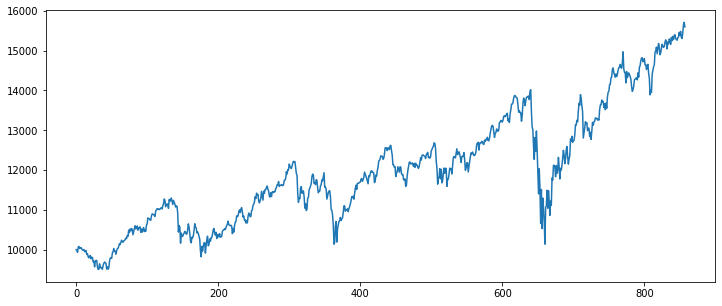

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 5))
plt.plot(df['基準価額'])

In [3]:
import numpy as np

t1 = df['基準価額'].values
t2 = np.roll(df['基準価額'].values, 1)
t2[0] = t2[1]

gap = t1 - t2
incr = (gap >= 0).astype('?')

ddf = df.copy()
ddf['gap'] = gap
ddf['increase'] = incr

In [4]:
src = []
nxt = []
sp = 0
rng = 5

while True:
    src.append(gap[sp:rng+sp])
    nxt.append(gap[sp+rng])
    if sp == len(incr) - rng - 1:
        break
    sp += 1
    
src = np.array(src)
nxt = np.array(nxt)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(src, nxt, test_size=0.3)

In [43]:
"""
https://axa.biopapyrus.jp/deep-learning/pytorch/regression.html
"""
import torch
import torch.nn.functional
import torch.utils.data


class Net(torch.nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(5, 25)
        self.fc2 = torch.nn.Linear(25, 10)
        self.fc3 = torch.nn.Linear(10, 5)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [46]:
num_epochs = 10

# convert numpy array to tensor
x_tensor = torch.from_numpy(x_train).float()
y_tensor = torch.from_numpy(y_train.reshape(-1, 1)).float()

# crate instance
net = Net()

# set training mode
net.train()

# set training parameters
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

# start to train
epoch_loss = []
for epoch in range(num_epochs):
    # forward
    outputs = net(x_tensor)
    
    # calculate loss
    loss = criterion(outputs, y_tensor)
    
    # update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # save loss of this epoch
    epoch_loss.append(loss.data.numpy().tolist())

Text(0, 0.5, 'loss')

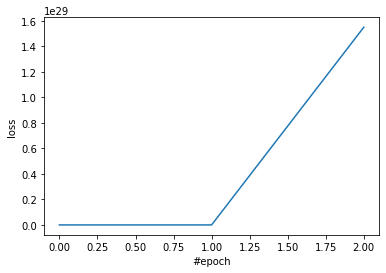

In [47]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(epoch_loss))), epoch_loss)
ax.set_xlabel('#epoch')
ax.set_ylabel('loss')

In [42]:
epoch_loss

[25375.87890625,
 2885289216.0,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 n

In [34]:
# set validaiton mode
net.eval()

# predict 'y'
with torch.no_grad():
    y_pred_tensor = net(torch.from_numpy(x_test).float())

# convert tensor to numpy
y_pred = y_pred_tensor.data.numpy()

In [35]:
# t = [10000]
# for i in range(act.shape[0]):
#     t.append(t[i] + act[i])

# fig = plt.figure(figsize=(15, 5))
# plt.plot(t)

y_pred

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]], dtype=float32)